In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
from contractions import contractions_dict
def expand_contractions(text, contraction_map=None):
    if contraction_map is None:
        contraction_map = contractions_dict

    # Using regex for getting all contracted words
    contractions_keys = '|'.join(re.escape(key) for key in contraction_map.keys())
    contractions_pattern = re.compile(f'({contractions_keys})', flags=re.DOTALL)

    expanded_text = contractions_pattern.sub(lambda match: contraction_map.get(match.group(0), match.group(0)), text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [3]:
entertainment = pd.read_csv('data/BBCNewsSummaryCSV/entertainment_data.csv') 
sport = pd.read_csv('data/BBCNewsSummaryCSV/sport_data.csv')
tech = pd.read_csv('data/BBCNewsSummaryCSV/tech_data.csv')
business = pd.read_csv('data/BBCNewsSummaryCSV/business_data.csv')
politics = pd.read_csv('data/BBCNewsSummaryCSV/politics_data.csv')

In [4]:
training_dataset = pd.concat([entertainment,sport,tech], ignore_index=True)
testing_dataset = pd.concat([business,politics], ignore_index=True)

In [5]:
print("Training size:",training_dataset.size)
print("Testing size:",testing_dataset.size)

Training size: 3894
Testing size: 2781


In [6]:
training_dataset = training_dataset.sample(frac=1).reset_index(drop=True)
testing_dataset = testing_dataset.sample(frac=1).reset_index(drop=True)

In [7]:
training_dataset['newsarticle'] = training_dataset['newsarticle'].apply(expand_contractions)
testing_dataset['newsarticle'] = testing_dataset['newsarticle'].apply(expand_contractions)

In [8]:
def getSenLen(sentence):
    return len(sentence.split())

In [9]:
training_dataset['article_length'] = training_dataset['newsarticle'].apply(getSenLen)
training_dataset['summary_length'] = training_dataset['summary'].apply(getSenLen)
testing_dataset['article_length'] = testing_dataset['newsarticle'].apply(getSenLen)
testing_dataset['summary_length'] = testing_dataset['summary'].apply(getSenLen)


In [10]:
training_dataset.head()

,filename,newsarticle,summary,article_length,summary_length
0,entertainment_110,Rap boss arrested over drug find\n\nRap mogul ...,He was driving Shakur's car at the time and wa...,258,99
1,sport_112,Parry firm over Gerrard\n\nListen to the full ...,I would keep Gerrard.But when asked if Gerrard...,1374,608
2,tech_188,Call for action on internet scam\n\nPhone comp...,Phone companies are not doing enough to warn c...,1360,582
3,tech_120,Dozens held over ID fraud site\n\nTwenty-eight...,"Twenty-eight people, including a Briton, have ...",465,199
4,entertainment_197,John Peel replacement show begins\n\nThe perma...,The permanent replacement for late DJ John Pee...,458,212


Text(0.5, 1.0, 'Boxplot of Summary Lengths')

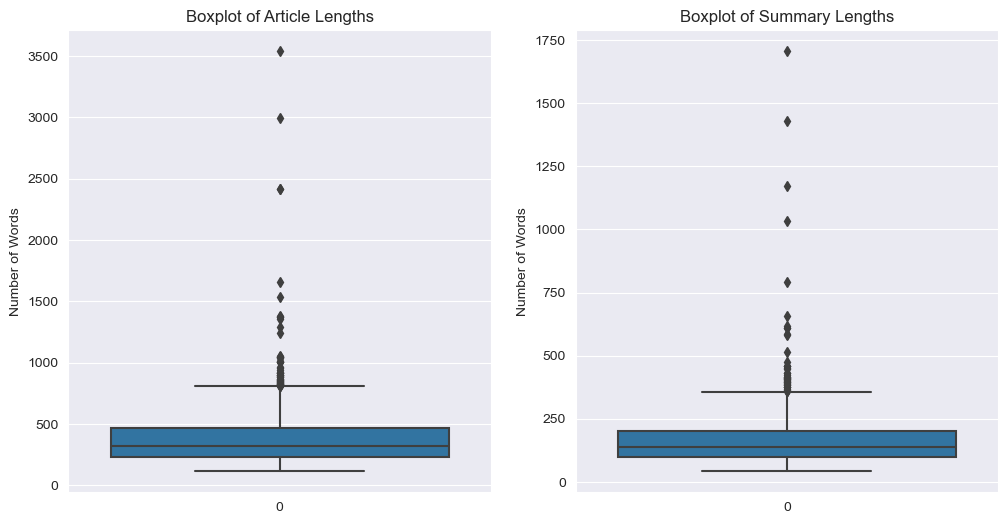

In [11]:
# Boxplots for Article and Summary Lengths
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(training_dataset["article_length"], ax=axes[0])
axes[0].set_ylabel("Number of Words")
axes[0].set_title("Boxplot of Article Lengths")

sns.boxplot(training_dataset["summary_length"], ax=axes[1])
axes[1].set_ylabel("Number of Words")
axes[1].set_title("Boxplot of Summary Lengths")

In [12]:
training_dataset.describe()

,article_length,summary_length
count,1298.000000,1298.000000
mean,385.013097,165.270416
std,243.616315,109.734916
min,115.000000,42.000000
25%,235.000000,99.250000
50%,323.000000,137.000000
75%,465.750000,202.750000
max,3540.000000,1706.000000


Text(0.5, 1.0, 'Boxplot of Summary Lengths')

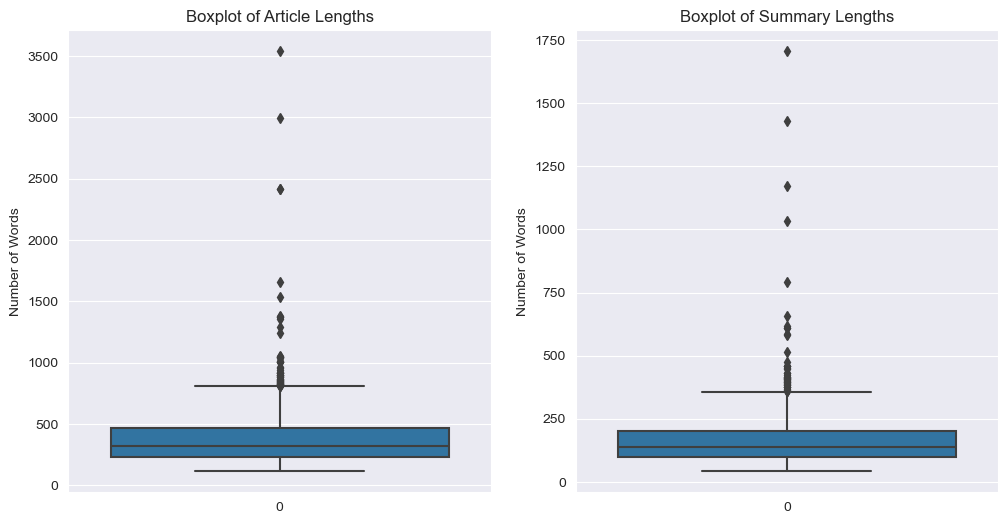

In [13]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for the articles' number of words
sns.boxplot(training_dataset["article_length"], ax=axes[0])
axes[0].set_ylabel("Number of Words")
axes[0].set_title("Boxplot of Article Lengths")

# Plot for the summaries' number of words
sns.boxplot(training_dataset["summary_length"], ax=axes[1])
axes[1].set_ylabel("Number of Words")
axes[1].set_title("Boxplot of Summary Lengths")


In [14]:
# Get statistics for the articles boxplot
lines_articles = axes[0].lines[:6]
articles_stats = [line.get_ydata()[0] for line in lines_articles]
Q1_articles, Q3_articles, lower_whisker_articles, upper_whisker_articles, median_articles = articles_stats[:5]

# Get statistics for the summaries boxplot
lines_summaries = axes[1].lines[:6]
summaries_stats = [line.get_ydata()[0] for line in lines_summaries]
Q1_summaries, Q3_summaries, lower_whisker_summaries, upper_whisker_summaries, median_summaries = summaries_stats[:5]

In [15]:
print(upper_whisker_articles)
print(upper_whisker_summaries)

810.0
355.0


In [16]:
training_dataset = training_dataset[(training_dataset['summary_length'] <= upper_whisker_summaries) & (training_dataset['article_length'] <= upper_whisker_articles)]
testing_dataset = testing_dataset[(testing_dataset['summary_length'] <= upper_whisker_summaries) & (testing_dataset['article_length'] <= upper_whisker_articles)]

In [17]:
training_dataset.head()

,filename,newsarticle,summary,article_length,summary_length
0,entertainment_110,Rap boss arrested over drug find\n\nRap mogul ...,He was driving Shakur's car at the time and wa...,258,99
3,tech_120,Dozens held over ID fraud site\n\nTwenty-eight...,"Twenty-eight people, including a Briton, have ...",465,199
4,entertainment_197,John Peel replacement show begins\n\nThe perma...,The permanent replacement for late DJ John Pee...,458,212
5,entertainment_297,Fockers keeps US box office lead\n\nFilm comed...,The Incredibles took $300m (£160m) outside the...,213,103
6,tech_170,"Casual gaming to take off\n\nGames aimed at ""c...",The trend shows that gaming is not just about ...,545,245


In [18]:
training_dataset.describe()

,article_length,summary_length
count,1240.000000,1240.000000
mean,351.926613,150.501613
std,156.300192,67.456332
min,115.000000,42.000000
25%,233.000000,97.000000
50%,315.000000,133.500000
75%,441.000000,190.000000
max,810.000000,354.000000


In [19]:
df = training_dataset[0:100]

In [20]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
from rouge_score import rouge_scorer
from torch.cuda.amp import autocast, GradScaler
from torch.nn.utils import clip_grad_norm_

In [21]:
# Define the device for GPU usage (if available)
if torch.backends.mps.is_available():
    arch = "mps"
elif torch.cuda.is_available():
    arch = "cuda"
else:
    arch = "cpu"

device = torch.device(arch)

In [22]:
# Tokenize and preprocess the text data
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
max_length = 512  # Maximum sequence length

def tokenize_text(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True, padding='max_length', return_attention_mask=True)
    return inputs.to(device)  # Move the tokenized inputs to the GPU

def tokenize_summary(text):
    inputs = tokenizer.encode(text, return_tensors="pt", max_length=280, truncation=True, padding='max_length', return_attention_mask=True)
    return inputs.to(device)  # Move the tokenized summaries to the GPU

def tokenize_and_stack(df, text_column, summary_column):
    df['TokenizedText'] = df[text_column].apply(tokenize_text)
    df['TokenizedSummary'] = df[summary_column].apply(tokenize_summary)
    
    # Convert tokenized data to PyTorch tensors
    X = torch.stack([seq.squeeze() for seq in df['TokenizedText']])
    Y = torch.stack([seq.squeeze() for seq in df['TokenizedSummary']])
    
    # Define a DataLoader for batching data
    dataset = TensorDataset(X, Y)
    dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
    
    return X, Y, dataloader

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
test_df = testing_dataset[0:len(val_df)]

# Tokenize and stack for training set
X_train, Y_train, train_dataloader = tokenize_and_stack(train_df, 'newsarticle', 'summary')

# Tokenize and stack for validation set
X_val, Y_val, val_dataloader = tokenize_and_stack(val_df, 'newsarticle', 'summary')

# Tokenize and stack for validation set
X_test, Y_test, test_dataloader = tokenize_and_stack(test_df, 'newsarticle', 'summary')



/var/folders/qd/t1dpxdpn0xj2byx5h2wvvzr80000gn/T/ipykernel_12342/3102345579.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TokenizedText'] = df[text_column].apply(tokenize_text)
/var/folders/qd/t1dpxdpn0xj2byx5h2wvvzr80000gn/T/ipykernel_12342/3102345579.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TokenizedSummary'] = df[summary_column].apply(tokenize_summary)


In [23]:
# Define the BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

# Create a GradScaler for mixed-precision training
scaler = GradScaler()

# Define hyperparameters
model.to(device)  # Move the model to the GPU
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)  
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=len(train_dataloader) * 10)  # Add learning rate scheduler
early_stopping_rounds = 2
best_rouge_score = -1
current_round = 0

# Define gradient accumulation steps
accumulation_steps = 20  # You can adjust this number


/Users/kysgattu/anaconda3/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:124: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [25]:
# Training loop
train_losses = []
for epoch in range(2):  # Change the number of epochs as needed
    model.train()
    total_loss = 0.0
    optimizer.zero_grad()

    for step, batch in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{2}")):
        inputs = batch[0].to(device)  # Move the input batch to the GPU
        attention_mask = (inputs != 0).float().to(device)  # Create attention mask
        targets = batch[1].to(device)  # Move the target batch to the GPU

        with autocast():
            outputs = model(input_ids=inputs, attention_mask=attention_mask, decoder_input_ids=targets, labels=targets)
            loss = outputs.loss

        # Perform gradient accumulation
        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        if (step + 1) % accumulation_steps == 0:
            # Update gradients and optimizer once every accumulation_steps
            clip_grad_norm_(model.parameters(), max_norm=1.0)  # Optional gradient clipping
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        total_loss += loss.item()

    train_loss = total_loss / len(train_dataloader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{2}, Train Loss: {train_loss:.4f}")

# Save the model after training
model.save_pretrained("saved_model")

Epoch 1/2:   0%|          | 0/20 [00:00<?, ?it/s]/Users/kysgattu/anaconda3/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Epoch 1/2: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


Epoch 1/2, Train Loss: 0.6561


Epoch 2/2: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


Epoch 2/2, Train Loss: 0.6517


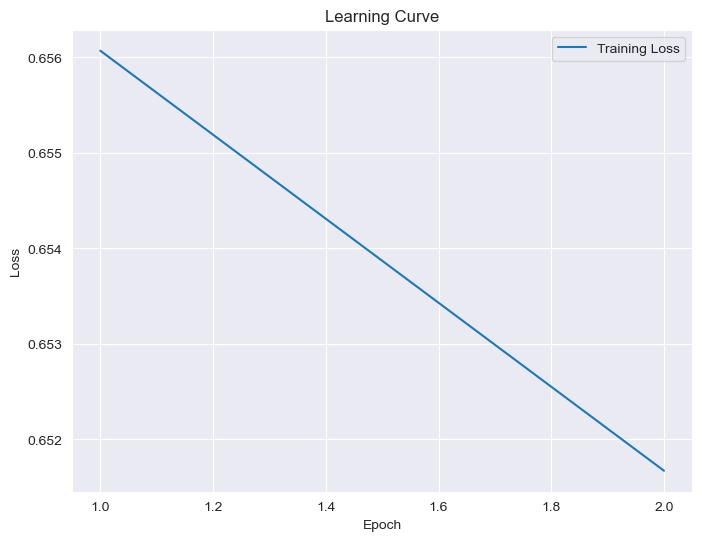

In [26]:
# Plot the Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
def genSummaryAndEvaluate(model, dataloader):
    model.eval()
    
    test_articles = []
    actual_summaries = []
    predicted_summaries = []
    rouge1_precision_scores = []
    rouge2_precision_scores = []
    rougeL_precision_scores = []

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'])

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating Test"):
            inputs = batch[0].to(device)
            attention_mask = (inputs != 0).float().to(device)
            targets = batch[1].to(device)
            outputs = model.generate(input_ids=inputs, attention_mask=attention_mask, max_length=150, num_beams=17, length_penalty=2.0, early_stopping=False)
            
            for output, target, input_text in zip(outputs, targets, inputs):
                # Calculate ROUGE-1 precision for each sample
                output_text = tokenizer.decode(output, skip_special_tokens=True)
                target_text = tokenizer.decode(target, skip_special_tokens=True)
                rouge_scores = scorer.score(output_text, target_text)
                rouge1_precision_scores.append(rouge_scores['rouge1'].precision)
                rouge2_precision_scores.append(rouge_scores['rouge2'].precision)
                rougeL_precision_scores.append(rouge_scores['rougeL'].precision)
                
                # Append tokenized text, actual summaries, and predicted summaries
                test_articles.append(tokenizer.decode(input_text, skip_special_tokens=True))
                actual_summaries.append(target_text)
                predicted_summaries.append(output_text)

    data = {
        'Article': test_articles,
        'Actual Summary': actual_summaries,
        'Predicted Summary': predicted_summaries,
        'ROUGE-1 Precision': rouge1_precision_scores,
        'ROUGE-2 Precision': rouge2_precision_scores,
        'ROUGE-L Precision': rougeL_precision_scores,
    }
    results_df = pd.DataFrame(data)
    return results_df
    # return test_articles, actual_summaries, predicted_summaries, rouge1_precision_scores

# # Evaluate the model
# test_articles, actual_summaries, predicted_summaries, rouge1_precision_scores = evaluate(model, val_dataloader)
# 
# # Create a dictionary with the extracted data
# data = {
#     'Article': test_articles,
#     'Actual Summary': actual_summaries,
#     'Predicted Summary': predicted_summaries,
#     'ROUGE-1 Precision': rouge1_precision_scores,
# }
# 
# # Create a Pandas DataFrame from the dictionary
# results_df = pd.DataFrame(data)
# 
# # Display the DataFrame
# pd.set_option('display.max_colwidth', None)
# results_df.head(5)

In [26]:
sameCategoryData = genSummaryAndEvaluate(model, val_dataloader)

Evaluating Test: 100%|██████████| 5/5 [04:40<00:00, 56.17s/it]


In [27]:
diffCategoryData = genSummaryAndEvaluate(model,test_dataloader)

Evaluating Test: 100%|██████████| 5/5 [05:14<00:00, 62.88s/it]


In [37]:
sameCategoryDF = pd.DataFrame(sameCategoryData)

In [38]:
diffCategoryDF = pd.DataFrame(diffCategoryData)

In [40]:
print(sameCategoryDF['ROUGE-1 Precision'])

0     0.347280
1     0.404255
2     0.619048
3     0.371795
4     0.495146
5     0.566038
6     0.378571
7     0.485380
8     0.358209
9     0.400901
10    0.775510
11    0.399160
12    0.544379
13    0.507463
14    0.709091
15    0.541667
16    0.583333
17    0.475806
18    0.449704
19    0.512048
Name: ROUGE-1 Precision, dtype: float64


In [41]:
print(diffCategoryDF['ROUGE-1 Precision'])

0     0.469027
1     0.626168
2     0.441667
3     0.353448
4     0.458065
5     0.480519
6     0.364103
7     0.384211
8     0.443609
9     0.529801
10    0.768421
11    0.688312
12    0.580645
13    0.714286
14    0.424528
15    0.388626
16    0.629630
17    0.514925
18    0.562963
19    0.525316
Name: ROUGE-1 Precision, dtype: float64


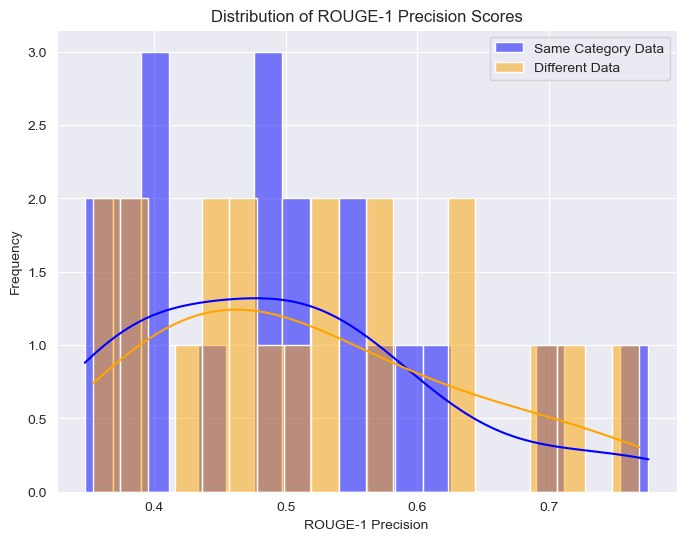

In [43]:
# Distribution of ROUGE-1 Precision Scores
plt.figure(figsize=(8, 6))
sns.histplot(sameCategoryData['ROUGE-1 Precision'], bins=20, kde=True, color='blue', label='Same Category Data')
sns.histplot(diffCategoryData['ROUGE-1 Precision'], bins=20, kde=True, color='orange', label='Different Data')
plt.title('Distribution of ROUGE-1 Precision Scores')
plt.xlabel('ROUGE-1 Precision')
plt.ylabel('Frequency')
plt.legend()
plt.show()

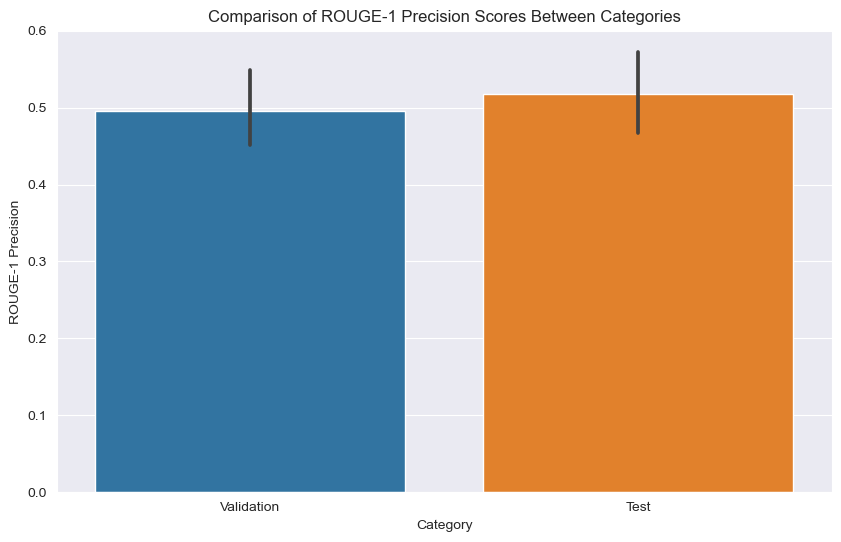

In [45]:
# Assuming you have separate DataFrames for validation and test data
sameCategoryDF['Category'] = 'Validation'
diffCategoryDF['Category'] = 'Test'

# Combine the two datasets for comparison
combinedData = pd.concat([sameCategoryDF, diffCategoryDF], ignore_index=True)

# Comparison of ROUGE-1 Precision Scores Between Categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='ROUGE-1 Precision', data=combinedData)
plt.title('Comparison of ROUGE-1 Precision Scores Between Categories')
plt.xlabel('Category')
plt.ylabel('ROUGE-1 Precision')
plt.show()

# TO DO
### > Seperate Generate and Evaluate
### > Add more Comparisions
### > Rewrite code to pose different
### > Write relevant coments
### > Run on Full


In [32]:
get_ipython().system('jupyter nbconvert --to script BART-Base.ipynb')


[NbConvertApp] Converting notebook BART-Base.ipynb to script
[NbConvertApp] Writing 10781 bytes to BART-Base.py
